# TensorFlow overview
While the homeworks will be written in torch, the labs are written in tensorflow. Most of the time, only a very basic tensorflow knowledge suffices for solving them. Since tensorflow is not used during other ML courses at MIMUW, we will introduce it briefly here.

In [ ]:
import tensorflow as tf
import numpy as np
import keras

#Tensors

Example tensor operations in tensorflow




In [ ]:
print(tf.math.add(1, 2))
print(tf.math.add([1, 2], [3, 4]))
print(tf.math.square(5))
print(tf.math.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.math.square(2) + tf.math.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In contrast to pytorch, in tensorflow numpy arrays can be used instead of tf.Tensor - they get converted automatically:

In [ ]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.math.multiply(ndarray, 42)
print(tensor)

print("And NumPy operations convert Tensors to NumPy arrays automatically")
print(np.add(tensor, 1))

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to NumPy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]


Tensorflow automatically decides which device to choose for execution - it moves tensors between GPU and CPU as needed. Of course it is also possible to do it manually.

In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))


Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


In [ ]:
###########################################
# Implement mse loss                      #
# using vector operations from tensorflow #
###########################################

def mse_loss(y_true, y_pred):
  ### TODO ###
  return tf.math.reduce_mean(tf.math.square(y_true - y_pred))
  ### END ###


loss_fn = tf.keras.losses.MeanSquaredError()
y_true = np.random.rand(4, 10)
y_pred = np.random.rand(4, 10)
print(loss_fn(y_true, y_pred))
print(mse_loss(y_true, y_pred.astype(np.float64)))

tf.Tensor(0.18689637, shape=(), dtype=float32)
tf.Tensor(0.1868963632677211, shape=(), dtype=float64)


## Dataset Definition
The dataset we will be using for network training is Cifar10.

In [ ]:
dataset = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = dataset.load_data()

##############################################
# Scale the data to be in (0, 1) interval    #
##############################################
### TODO ###
def scale_data(train, test):
  train = train.astype('float32') / 255.0
  test = test.astype('float32') / 255.0

  return train, test

x_train, x_test = scale_data(x_train, x_test)
### END ###

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

## Keras Sequential
The most straightforward wat to define a model is using Keras Sequential.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.1614 - loss: 2.1928
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2160 - loss: 2.0499
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2492 - loss: 1.9789
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2622 - loss: 1.9605
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2683 - loss: 1.9445
313/313 - 1s - 4ms/step - accuracy: 0.2935 - loss: 1.8854


We can use `keras.utils.plot_model` to plot the model.

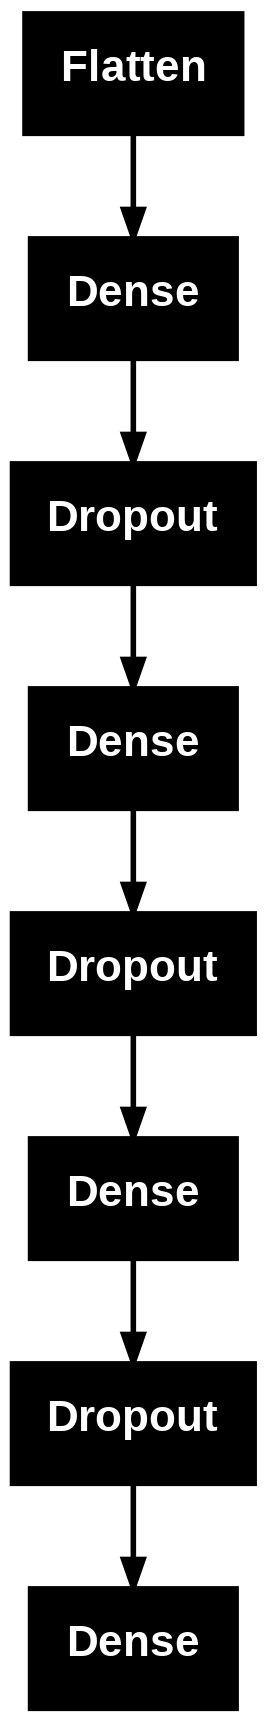

In [ ]:
keras.utils.plot_model(model, "dense_model.png")

We can call the model as in torch. The mode that the model is called in can be specified by passing the `training` argument.

In [ ]:
features = tf.random.normal((10, 32, 32, 3))
predictions = model(features, training=False)

print(predictions)

tf.Tensor(
[[ 8.6081773e-02 -2.6632950e-01  1.7115977e-01  1.7750534e-01
   2.7509406e-04  6.5451942e-02 -4.3641579e-01  1.8003052e-01
  -5.2432197e-01 -1.5726767e-01]
 [-1.0621058e-01 -4.0448070e-01  1.4559422e-01  1.9288796e-01
   1.4200920e-01  1.2630349e-01 -2.2647491e-01  2.0210777e-01
  -7.4474639e-01 -3.7835741e-01]
 [ 2.5743598e-01  1.4252196e-01 -1.1505807e-01  2.8580433e-01
  -5.2525729e-01  4.0029252e-01 -4.8355556e-01 -2.9142886e-01
   2.8505170e-01  8.5694149e-02]
 [ 4.1190505e-02  1.2240603e-01 -8.2827985e-02  2.1707535e-01
  -9.6049666e-02 -2.4892993e-02 -2.6104569e-01  4.7765024e-02
  -1.5343776e-01  3.2708430e-01]
 [ 3.7507764e-01  2.8267097e-01 -2.4916957e-01 -1.4591289e-01
  -2.1305723e-01 -3.5895872e-01 -6.9438493e-01  1.0396715e-01
   2.5696325e-01  5.5389750e-01]
 [-1.5815529e-01  4.7146016e-01 -6.3324004e-01  3.9847699e-01
  -7.0233184e-01  4.1045779e-01 -1.9510281e-01 -2.5501961e-01
  -2.4770682e-01  3.1513801e-01]
 [-1.1682513e-01  5.5612689e-01 -5.0124550e-01 

Then we can convert it to logits and find the predictions

In [ ]:
##########################################
#   Convert the predictions to logits    #
#   And calculate the resulting label    #
##########################################

### TODO ###
labels = tf.argmax(predictions, axis=1)
labels
### END ###

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 7, 5, 9, 9, 1, 1, 0, 9, 9])>

Using your background from the dnn course and layers from `tf.keras.layers`  define the model so that the accuracy of 0.5 is reached within 5 epochs.

In [ ]:
##############################################
# Define a convolutional network             #
# That gets an accuracy over 50% in 5 epochs #
##############################################

### TODO ###
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])
### END ###

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.4216 - loss: 3.1827
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7130 - loss: 0.8427
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7991 - loss: 0.5915
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8524 - loss: 0.4360
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8958 - loss: 0.3107
313/313 - 3s - 10ms/step - accuracy: 0.6169 - loss: 1.4500


## Keras Functional API
Keras functional API allows for creating more flexible models than `keras.Sequential`. It will therefore be useful during this course.

In [ ]:
import keras
from keras import layers

Let's build the same dense model as before.

In [ ]:
inputs = keras.Input(shape=(3072,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

And again fit it to the data.

In [ ]:
##################################
# Flatten the images             #
##################################
### TODO ###
def flatten_data(x_train, x_test):
  x_flat_train = x_train.reshape(x_train.shape[0], -1)
  x_flat_test = x_test.reshape(x_test.shape[0], -1)

  return x_flat_train, x_flat_test

x_flat_train, x_flat_test = flatten_data(x_train, x_test)
### DONE ###

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

##############################################
# Train the model with batch size 128        #
# And learning rate 0.001                    #
##############################################
### TODO ###
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_flat_train, y_train, epochs=5, batch_size=128)
### DONE ###

test_loss, test_acc = model.evaluate(x_flat_test,  y_test, verbose=2)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1681 - loss: 2.1904
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2308 - loss: 2.0176
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2524 - loss: 1.9834
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2593 - loss: 1.9614
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2637 - loss: 1.9480
313/313 - 1s - 5ms/step - accuracy: 0.2591 - loss: 1.9330


Define the same network as in the previous exercise, but using the functional approach.

Write a training loop that does the same thing as happens above manually.

Create network with a plot like this on right.

In [ ]:
######################################
# Define the same convnet as before, #
# But use the functional API         #
######################################

### TODO ###
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)
### END ###

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4091 - loss: 3.4857
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7137 - loss: 0.8259
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7993 - loss: 0.5910
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8538 - loss: 0.4328
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8920 - loss: 0.3127
313/313 - 1s - 4ms/step - accuracy: 0.6174 - loss: 1.4283


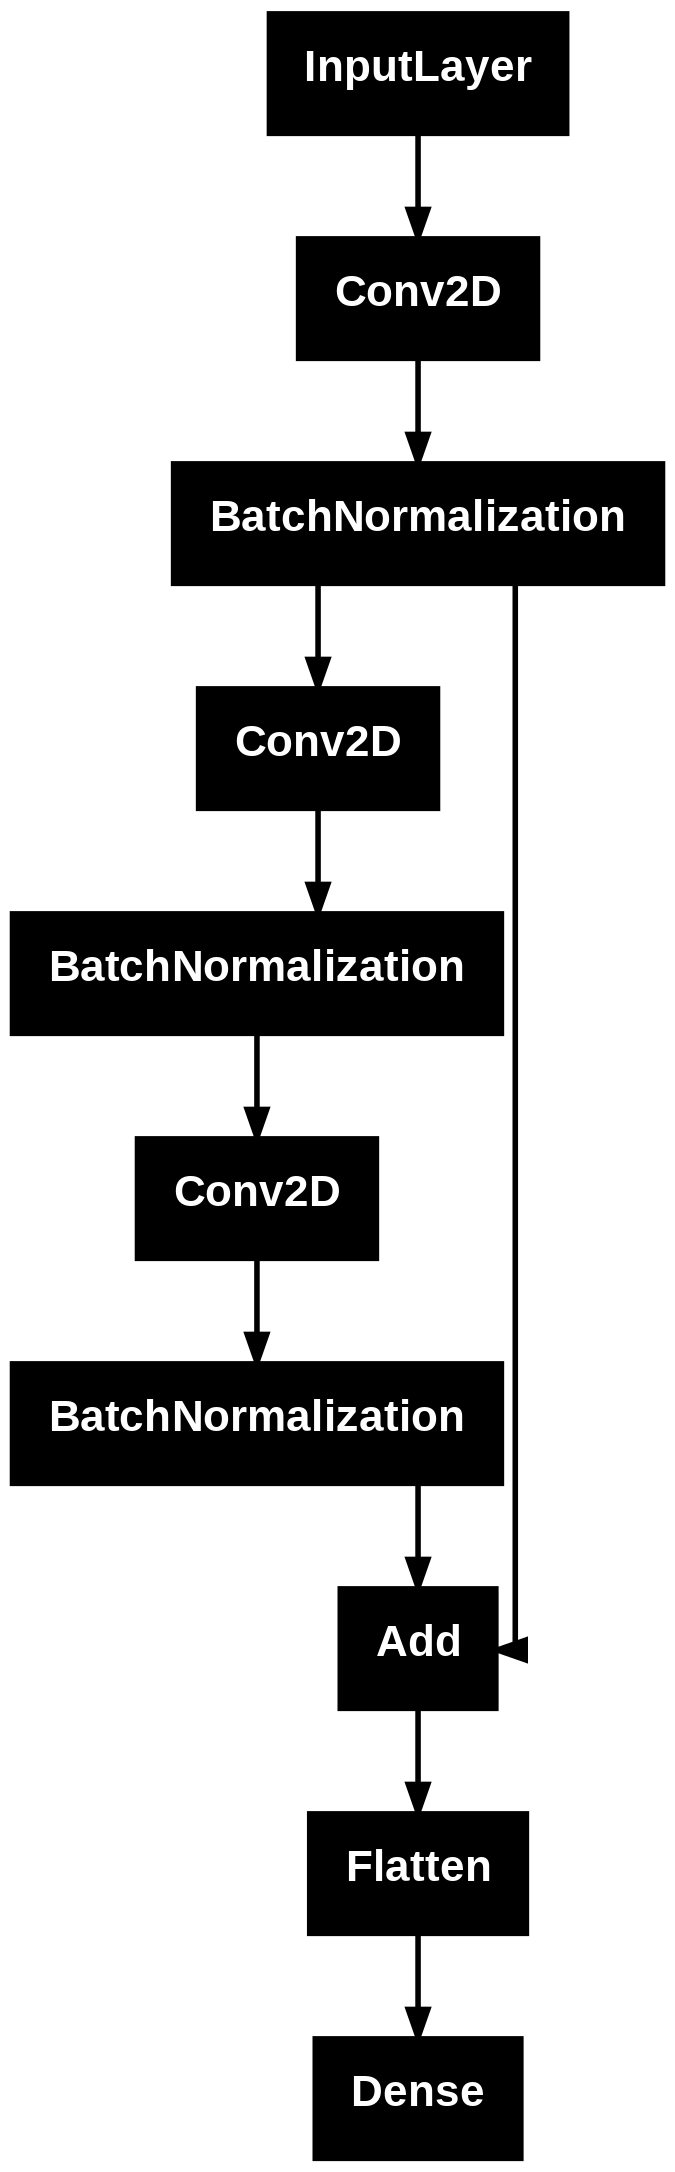

In [ ]:
######################################
# Add a residual connection to your #
# convnet, use the functional API   #
######################################

### TODO ###
inputs = keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
r = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(r)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, r])
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)
### END ###


model = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model, "residual_model.png")

Sometimes just using `.fit` method might not be enough. It is also possible to write the training loop more from scratch.

In [ ]:
batch_size = 32

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
ds_train_batch = train_dataset.batch(batch_size)
ds_test_batch = test_dataset.batch(batch_size)

def simple_forward(x, model, training):
  ########################################
  #   Get the predictions from the model #
  ########################################

  ### TODO ###
  return model(x, training=training)
  ### END ###

def loss(model, x, y, training, forward_fn):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = forward_fn(x, model, training)
  return loss_fn(y_true=y, y_pred=y_)

@tf.function
def grad(model, inputs, targets, forward_fn):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True, forward_fn=forward_fn)

  return loss_value, tape.gradient(loss_value, model.trainable_variables)

def run_training(optimizer, num_epoch, model, forward_fn):

  for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    test_epoch_loss_avg = tf.keras.metrics.Mean()
    test_epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x, y in ds_train_batch:
      loss_value, grads = grad(model, x, y, forward_fn)

      ########################
      # Apply the gradients  #
      ########################

      ### TODO ###
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      ### END ###

      epoch_loss_avg.update_state(loss_value)
      epoch_accuracy.update_state(y, model(x, training=True))

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                  epoch_accuracy.result()))

    ######################
    # Run the test epoch #
    ######################
    ### TODO ###
    for x, y in ds_test_batch:
      loss_value = loss(model, x, y, training=False, forward_fn=forward_fn)

      test_epoch_loss_avg.update_state(loss_value)
      test_epoch_accuracy.update_state(y, model(x, training=False))

    print("Test Loss: {:.3f}, Test Accuracy: {:.3%}".format(test_epoch_loss_avg.result(),
                                                            test_epoch_accuracy.result()))
    ### END ###

optimizer = tf.keras.optimizers.Adam()
num_epochs = 5

run_training(optimizer, num_epochs, model, simple_forward)


Epoch 000: Loss: 2.439, Accuracy: 54.202%
Test Loss: 1.525, Test Accuracy: 53.510%
Epoch 001: Loss: 1.114, Accuracy: 69.658%
Test Loss: 1.563, Test Accuracy: 53.080%
Epoch 002: Loss: 0.870, Accuracy: 78.516%
Test Loss: 1.770, Test Accuracy: 53.830%
Epoch 003: Loss: 0.696, Accuracy: 85.060%
Test Loss: 2.024, Test Accuracy: 54.050%
Epoch 004: Loss: 0.549, Accuracy: 89.814%
Test Loss: 2.260, Test Accuracy: 53.910%


Humans have two eyes. Let's try to simulate something similar with a neural network, that is train a separate encoder for the left and right parts of the image and then encode them together. Your network should have a plot similar to this one: 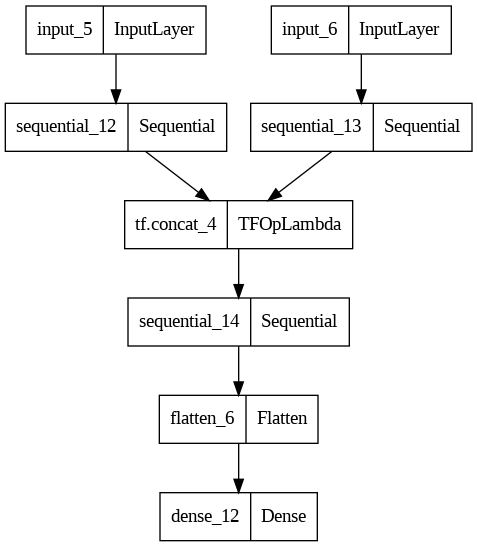

In [ ]:
#######################################
# Split x_train and x_test into       #
# two inputs with shapes (32, 16, 3)  #
#######################################

### TODO ###
def split_data(x):
  return tf.split(x, 2, axis=-2)

left_x_train, right_x_train = split_data(x_train)
left_x_test, right_x_test = split_data(x_test)
### END ###

In [ ]:
num_epochs = 5

def get_block(input_shape):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
  ])

  return model



def build_model(left_model, right_model, out_model):
  #######################################
  # Build the model so that its plot    #
  # resembles the one from the image    #
  #######################################

  ### TODO ###
  left_input = layers.Input(shape=(32, 16, 3))
  right_input = layers.Input(shape=(32, 16, 3))

  left_output = left_model(left_input)
  right_output = right_model(right_input)

  x = layers.concatenate([left_output, right_output], axis=-2)
  x = out_model(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10)(x)

  model = keras.Model([left_input, right_input], outputs)

  return model
  ### END ###


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

left_model = get_block((32, 16, 3))
right_model = get_block((32, 16, 3))
out_model = get_block((32, 32, 3))

model = build_model(left_model, right_model, out_model)
keras.utils.plot_model(model, "two_inputs_model.png")

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

###################
# Fit the model   #
###################
### TODO ###
model.fit([left_x_train, right_x_train], y_train, validation_data=\
          ([left_x_test, right_x_test], y_test), epochs=num_epochs)
### END ###

#######################
# Evaluate the model  #
#######################
### TODO ###
test_loss, test_acc = model.evaluate([left_x_test, right_x_test], y_test, verbose=2)
### END ###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.3450 - loss: 1.9533 - val_accuracy: 0.4846 - val_loss: 1.4478
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5159 - loss: 1.3708 - val_accuracy: 0.5079 - val_loss: 1.3712
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5528 - loss: 1.2606 - val_accuracy: 0.5224 - val_loss: 1.3347
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5687 - loss: 1.2137 - val_accuracy: 0.5264 - val_loss: 1.3373
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5818 - loss: 1.1777 - val_accuracy: 0.5231 - val_loss: 1.3517
313/313 - 1s - 3ms/step - accuracy: 0.5231 - loss: 1.3517


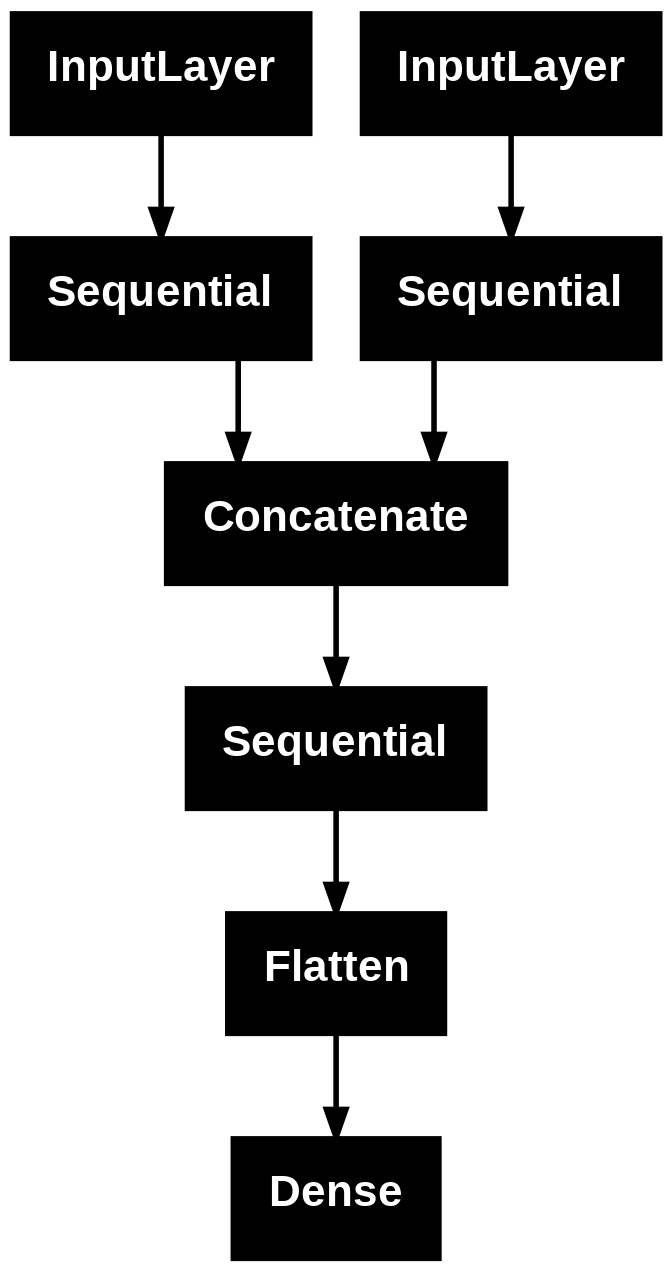

In [ ]:
keras.utils.plot_model(model, "two_eyes_model.png")